## K-Means 

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [39]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [44]:
df.shape

(250, 5)

In [45]:
# Select the features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [46]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
245,297,69
246,311,14
247,313,90
248,316,32


In [47]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
# Set the number of clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_scaled)
kmeans_cluster_assignments = kmeans.predict((X_scaled))

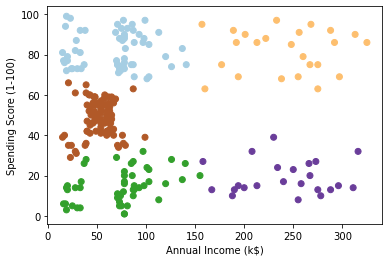

In [49]:
# Get the cluster labels
labels = kmeans_cluster_assignments

# Add the cluster labels to the original dataframe
df['cluster'] = labels

# Plot the clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='Paired')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## EM Algo

In [50]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=5)

In [51]:
model.fit(X_scaled)

GaussianMixture(n_components=5)

In [52]:
em_cluster_assignments = model.predict(X_scaled)

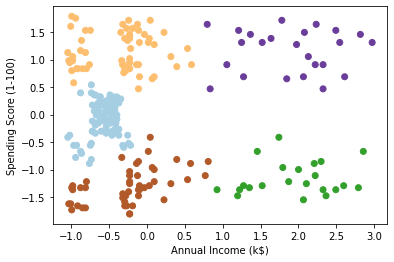

In [56]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=em_cluster_assignments,cmap='Paired')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Quality of Clustering

In [54]:
from sklearn.metrics import silhouette_score
kmeans_silhouette_score = silhouette_score(X_scaled, kmeans_cluster_assignments)
print("K-means silhouette score: ",kmeans_silhouette_score)

K-means silhouette score:  0.5311810435267463


In [55]:
em_silhouette_score = silhouette_score(X_scaled, em_cluster_assignments)
print ("EM silhouette score: ",em_silhouette_score) # ranges from -1 to 1

EM silhouette score:  0.5264322107392393
